# Introduction

Diabetes, a chronic metabolic disorder, affects millions worldwide, posing significant challenges to healthcare systems and individual well-being. As the prevalence of diabetes continues to rise, understanding its underlying patterns and predicting its occurrence becomes increasingly imperative.

This project delves into Exploratory Data Analysis (EDA) and predictive modeling to gain insights into diabetes. By harnessing the power of data, we aim to unravel hidden trends, identify risk factors, and ultimately develop predictive models that can assist in early detection and proactive management of this condition.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the Data

In [2]:
# read the dataset from dir
df = pd.read_csv("C:\\Users\\adilv\\OneDrive\\Desktop\\Healthcare Dataset\\diabetes.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# (row, columns)
df.shape

(768, 9)

In [8]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

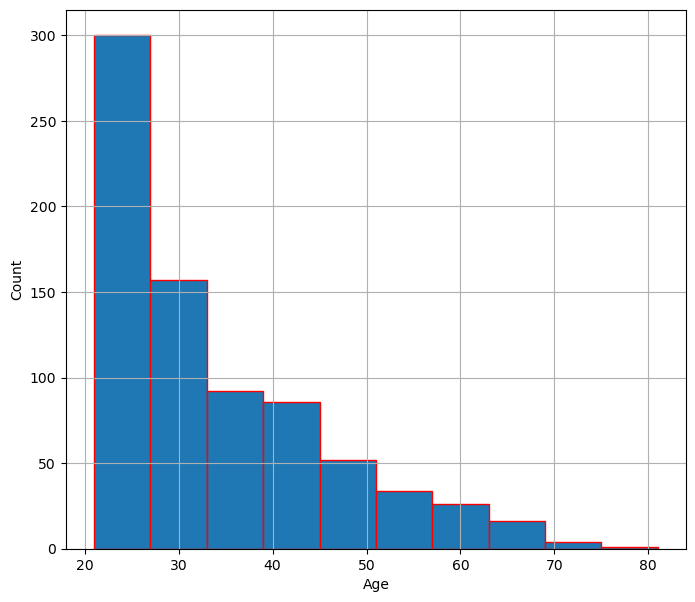

In [10]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="Red")
plt.show()

In [13]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

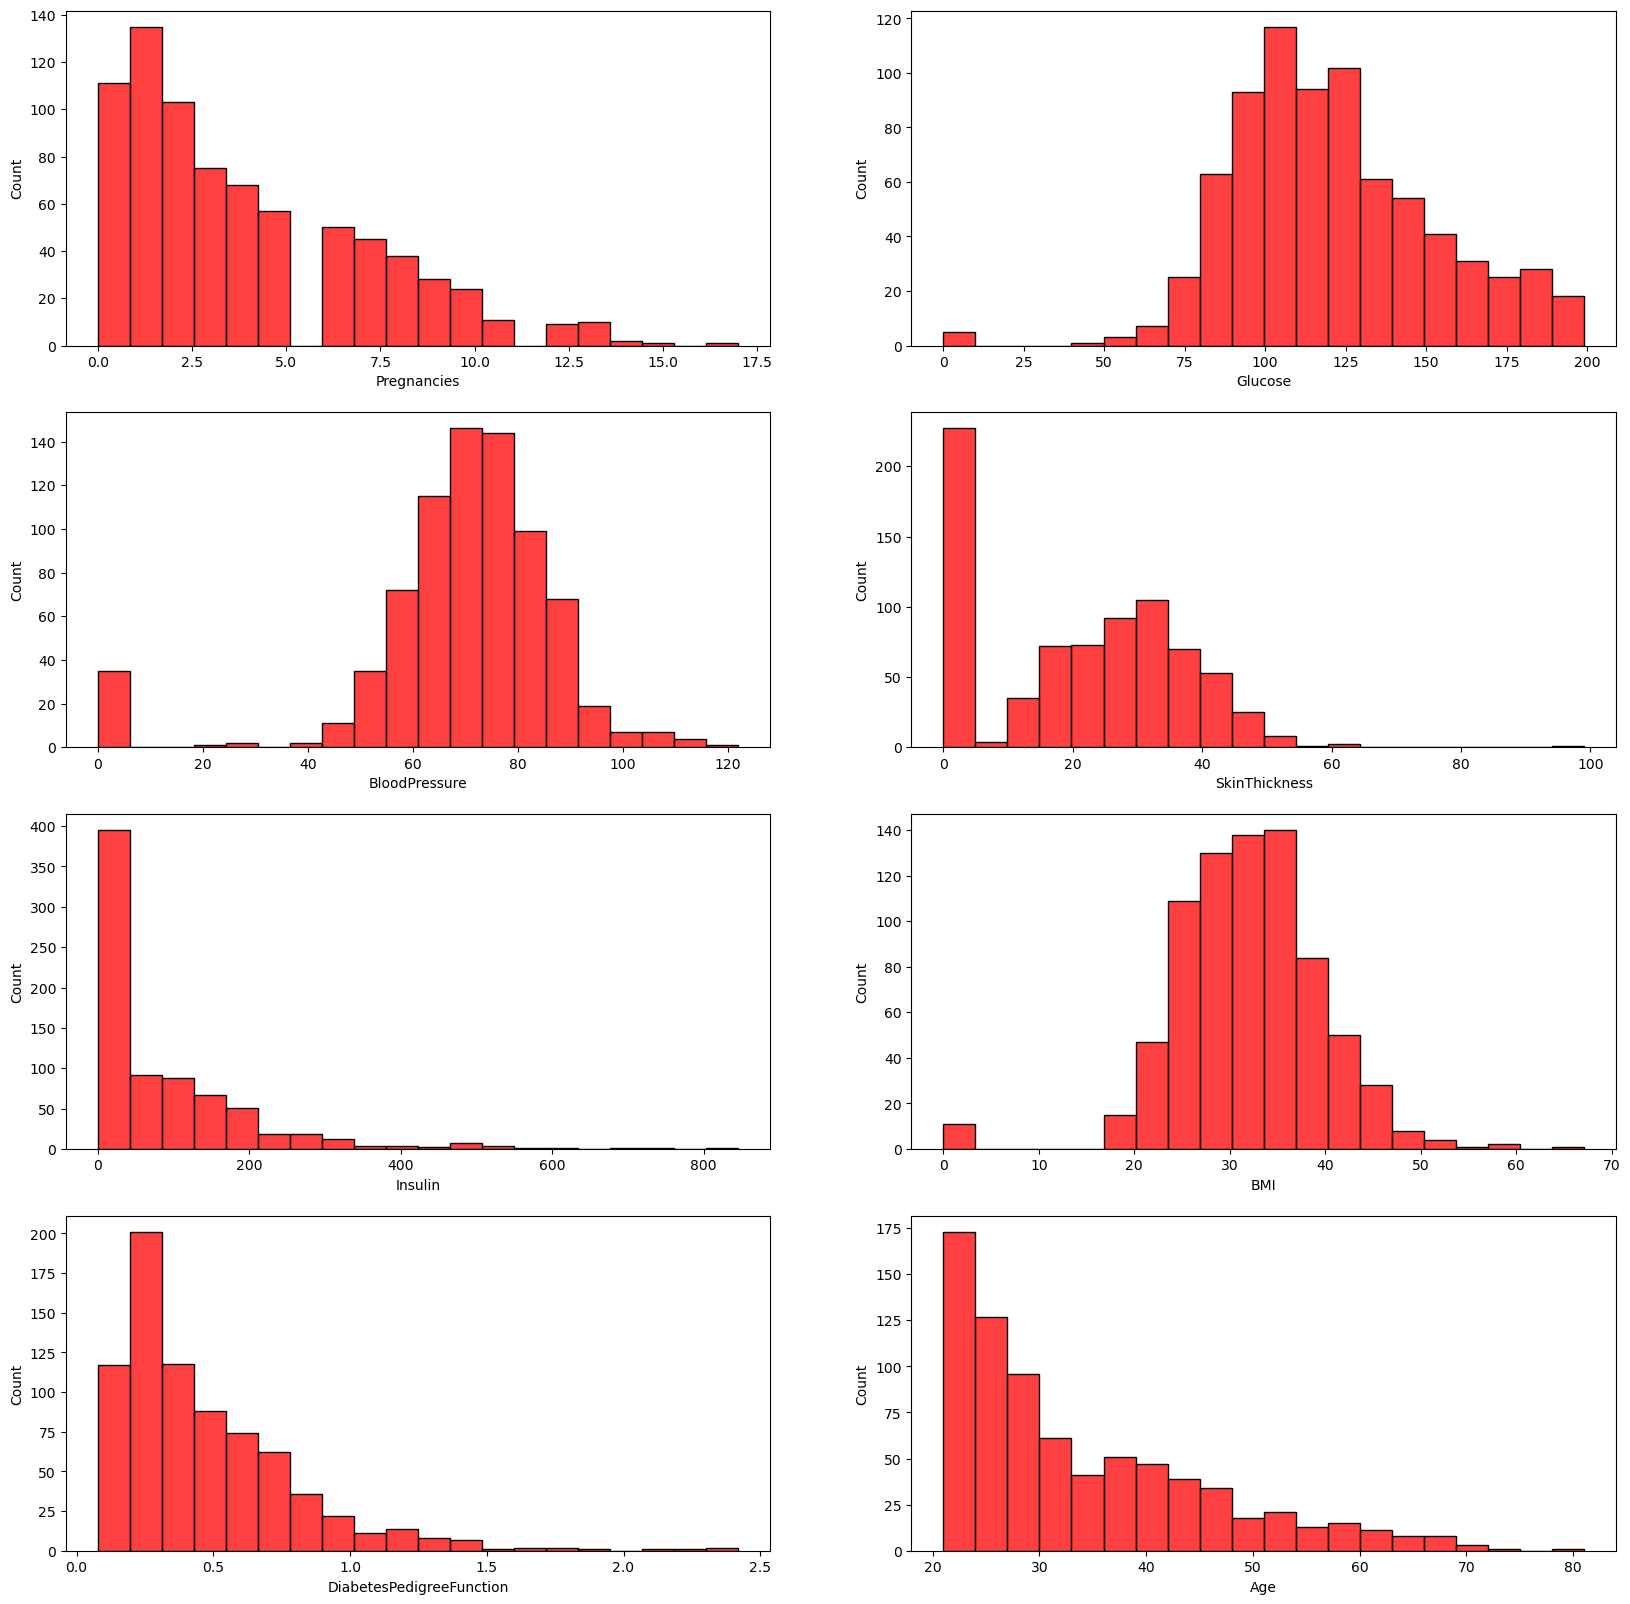

In [15]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.histplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.histplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.histplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.histplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.histplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.histplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.histplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.histplot(df.Age, bins=20, ax=ax[3,1], color="red")
plt.show()

In [16]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [17]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [18]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [19]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [20]:
# Homework
# 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
#     groupby-> mean/max

# Coorelation

In [21]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


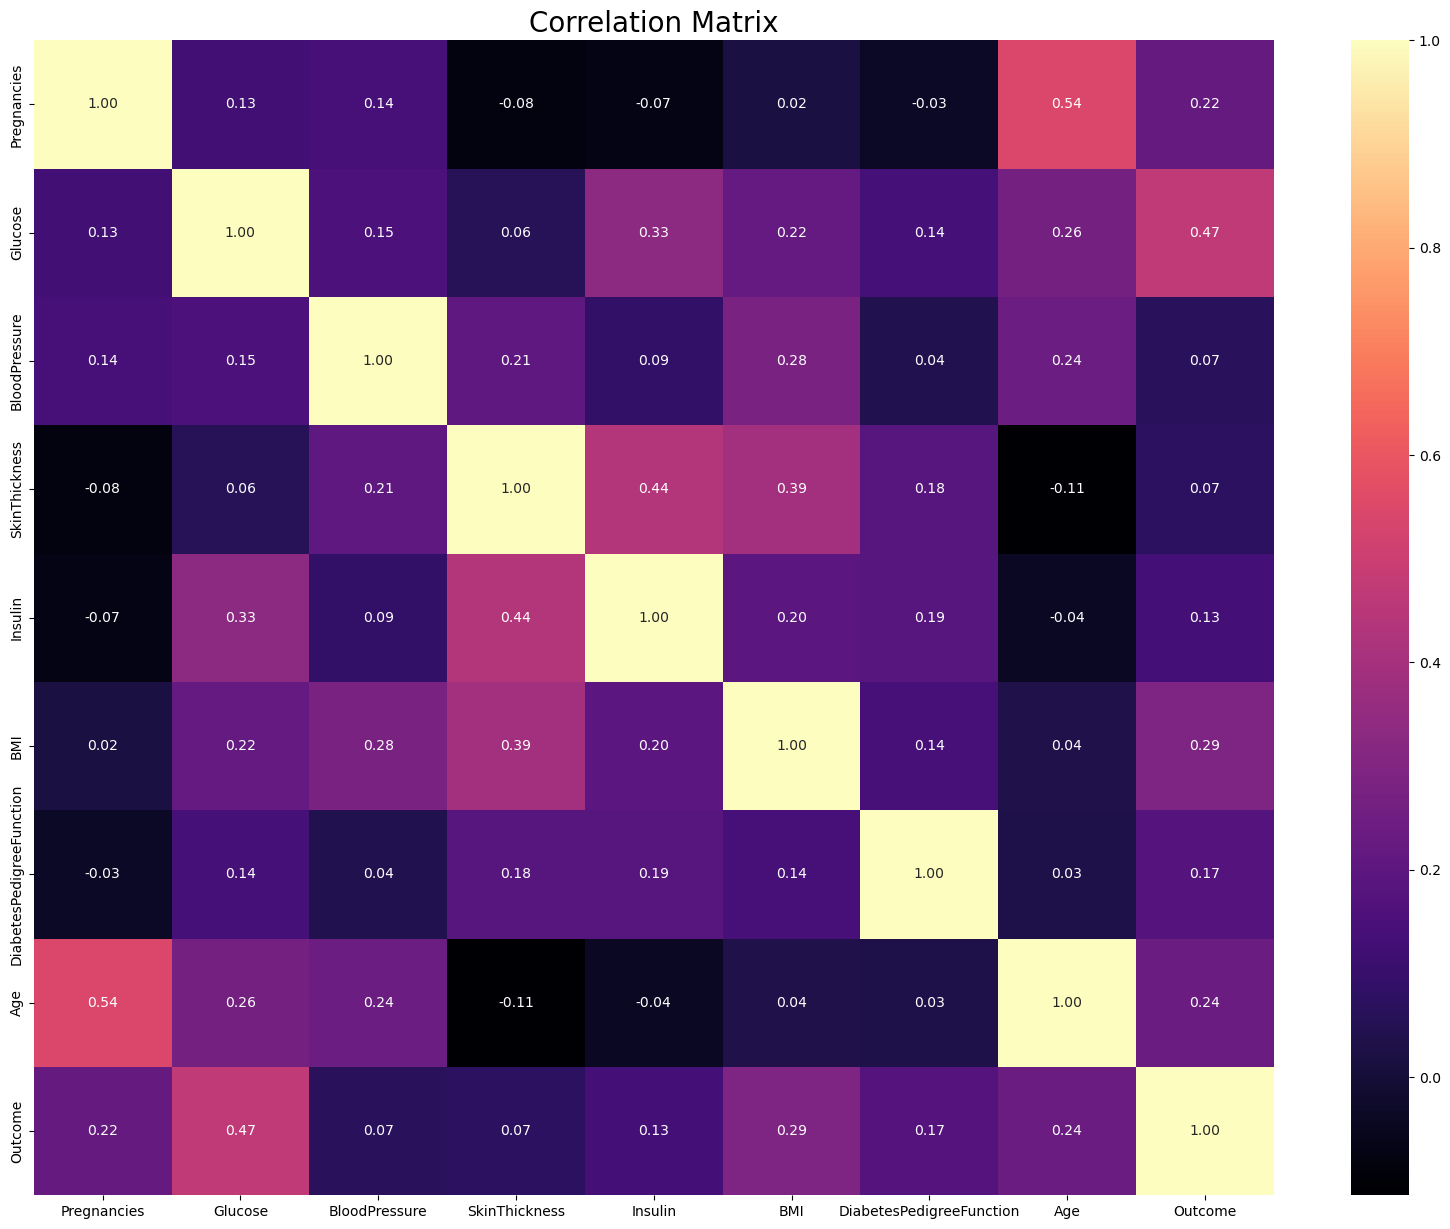

In [22]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# ML Algorithms

In [23]:
#logistic Regression

In [24]:
df['Outcome'].nunique()
df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [25]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=520)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [28]:
model=LogisticRegression()


In [29]:
import warnings

In [30]:
warnings.filterwarnings("ignore") 
model.fit(x_train,y_train)


LogisticRegression()

In [31]:
predict=model.predict(x_test)

In [32]:
confusion_matrix(y_test,predict)

array([[81,  9],
       [22, 42]], dtype=int64)

In [33]:
accuracy_score(y_test,predict)*100

79.87012987012987

In [34]:
# decision tree

In [35]:
df.head(1)
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [36]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=520)

In [38]:
model=DecisionTreeClassifier()


In [39]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
prediction=model.predict(x_test)

In [41]:
accuracy_score(y_test,prediction)*100

66.23376623376623

In [42]:
# random forest

In [43]:
model=RandomForestClassifier()

In [44]:
model.fit(x_train,y_train)


RandomForestClassifier()

In [45]:
pre=model.predict(x_test)

In [46]:
accuracy_score(y_test,pre)*100

77.27272727272727

Outcomes : The Algorithms used are logistic regression, Decision Tree and Random Forest

* As per the Predictions made, Logistic Regression have the Highest Accuracy score with 80% among these three.

# Conclusion

Unveiling Insights and Shaping the Future of Diabetes ManagementIn the realm of diabetes research, our journey through Exploratory Data Analysis (EDA) and predictive modeling has been illuminating and transformative. We embarked on this endeavor with the mission to unravel the intricacies of diabetes, seeking not only to understand its patterns but also to empower individuals and healthcare systems with proactive strategies for prevention and management.

Through rigorous EDA, we traversed the vast landscape of diabetes data, uncovering hidden correlations and insights that serve as guiding beacons in our quest. From demographic trends to biomarker associations, each visualization and statistical summary unveiled layers of complexity, shaping our understanding of this multifaceted condition.